In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [16]:
import nltk
import re
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
from nltk import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string


In [3]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [4]:
df_test = pd.read_csv("stanfordtrainingandtestdata/testdata.manual.2009.06.14.csv", encoding = "latin-1", names=["polarity", "tweet ID", "date","query","username","text"])
df_train = pd.read_csv("stanfordtrainingandtestdata/training.1600000.processed.noemoticon.csv", encoding = "latin-1", names=["polarity", "tweet ID", "date","query","username","text"])

In [5]:
df_train.head(15)

,polarity,tweet ID,date,query,username,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


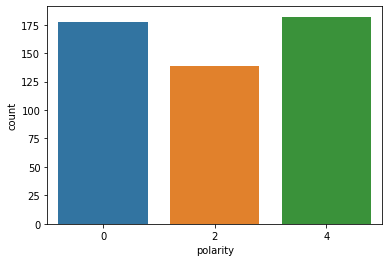

In [6]:
sns.countplot(df_test['polarity'])

In [7]:
df= df_train.append(df_test, ignore_index=True)
df=df.sample(frac=0.5)

In [8]:
df.head(15)

,polarity,tweet ID,date,query,username,text
653410,0,2238821620,Fri Jun 19 07:47:00 PDT 2009,NO_QUERY,misslindsey2218,Sad about Blake there goes my summer.
45931,0,1677280776,Sat May 02 01:17:06 PDT 2009,NO_QUERY,HMN851X,morning all sun shineing here in the south of ...
779339,0,2322903377,Wed Jun 24 23:30:31 PDT 2009,NO_QUERY,LindzeyNichole,I feel like a creeper watching @DeeYoung08 and...
466706,0,2175618985,Mon Jun 15 01:30:13 PDT 2009,NO_QUERY,jonnyhodges,is back at work flip side is only 2day and 2m...
1274018,4,2000915635,Mon Jun 01 23:18:36 PDT 2009,NO_QUERY,abbyts,@taylorswift13 http://twitpic.com/6g8k2 - too ...
1288536,4,2002499288,Tue Jun 02 04:23:34 PDT 2009,NO_QUERY,NohaFarouk,im going for a hair do..
1512866,4,2175285277,Mon Jun 15 00:34:14 PDT 2009,NO_QUERY,Samanfa_unk,going to see baby cousin tongiht naww jus to ...
120230,0,1832863797,Sun May 17 21:41:00 PDT 2009,NO_QUERY,jonjonnyp,@StyleUnleashed
341950,0,2015156863,Wed Jun 03 03:52:28 PDT 2009,NO_QUERY,theredeemed,"http://twitpic.com/6iwbr - Careful, I'm armed...."
1483717,4,2067527805,Sun Jun 07 12:30:14 PDT 2009,NO_QUERY,blackwithane,Got my bike back safely! Hope to go out and sh...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800249 entries, 653410 to 387278
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   polarity  800249 non-null  int64 
 1   tweet ID  800249 non-null  int64 
 2   date      800249 non-null  object
 3   query     800249 non-null  object
 4   username  800249 non-null  object
 5   text      800249 non-null  object
dtypes: int64(2), object(4)
memory usage: 42.7+ MB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 800177 entries, 653410 to 387278
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   polarity  800177 non-null  int64 
 1   tweet ID  800177 non-null  int64 
 2   date      800177 non-null  object
 3   query     800177 non-null  object
 4   username  800177 non-null  object
 5   text      800177 non-null  object
dtypes: int64(2), object(4)
memory usage: 42.7+ MB


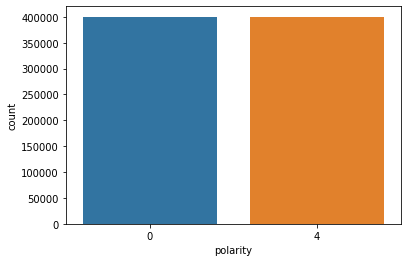

In [10]:
df=df[df['polarity']!=2]
df.info()
sns.countplot(df['polarity'])

In [11]:
df =df[['polarity','text']]
df.head()

,polarity,text
653410,0,Sad about Blake there goes my summer.
45931,0,morning all sun shineing here in the south of ...
779339,0,I feel like a creeper watching @DeeYoung08 and...
466706,0,is back at work flip side is only 2day and 2m...
1274018,4,@taylorswift13 http://twitpic.com/6g8k2 - too ...


In [12]:
from nltk.corpus import stopwords

In [13]:
def text_pr(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    nopunc = [c for c in text if c not in string.punctuation]
    text= "".join(nopunc)
    
    return [word.lower() for word in text.split() if word.lower() not in stopwords.words('english') and len(word)>3]


In [14]:
df['cleaned_text']=df['text'].apply(text_pr)

In [15]:
df.head(15)

,polarity,text,cleaned_text
653410,0,Sad about Blake there goes my summer.,"[blake, goes, summer]"
45931,0,morning all sun shineing here in the south of ...,"[morning, shineing, south, island, pity, like,..."
779339,0,I feel like a creeper watching @DeeYoung08 and...,"[feel, like, creeper, watching, talk, wish, talk]"
466706,0,is back at work flip side is only 2day and 2m...,"[back, work, flip, side, 2day, 2moro, work]"
1274018,4,@taylorswift13 http://twitpic.com/6g8k2 - too ...,[cute]
1288536,4,im going for a hair do..,"[going, hair]"
1512866,4,going to see baby cousin tongiht naww jus to ...,"[going, baby, cousin, tongiht, naww, neat, wee..."
120230,0,@StyleUnleashed,[]
341950,0,"http://twitpic.com/6iwbr - Careful, I'm armed....","[careful, armed, supposed, mature, adult]"
1483717,4,Got my bike back safely! Hope to go out and sh...,"[bike, back, safely, hope, shoot, today, curre..."


In [20]:
df1=df.copy()

In [183]:
#ps=PorterStemmer()
#df['cleaned_text'] = df['cleaned_text'].apply(lambda x: [ps.stem(i) for i in x])

In [18]:
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [word.lower() for word in text]
    return [lemmatizer.lemmatize(word, pos='a') for word in text]

In [19]:
df['lemma_text'] = df['cleaned_text'].apply(lemmatize)

In [20]:
df.head()

,polarity,text,cleaned_text,lemma_text
653410,0,Sad about Blake there goes my summer.,"[blake, goes, summer]","[blake, goes, summer]"
45931,0,morning all sun shineing here in the south of ...,"[morning, shineing, south, island, pity, like,...","[morning, shineing, south, island, pity, like,..."
779339,0,I feel like a creeper watching @DeeYoung08 and...,"[feel, like, creeper, watching, talk, wish, talk]","[feel, like, creeper, watching, talk, wish, talk]"
466706,0,is back at work flip side is only 2day and 2m...,"[back, work, flip, side, 2day, 2moro, work]","[back, work, flip, side, 2day, 2moro, work]"
1274018,4,@taylorswift13 http://twitpic.com/6g8k2 - too ...,[cute],[cute]


In [21]:
df['cleaned_text']=df['cleaned_text'].apply(" ".join)

In [22]:
df.head()

,polarity,text,cleaned_text,lemma_text
653410,0,Sad about Blake there goes my summer.,blake goes summer,"[blake, goes, summer]"
45931,0,morning all sun shineing here in the south of ...,morning shineing south island pity like buildi...,"[morning, shineing, south, island, pity, like,..."
779339,0,I feel like a creeper watching @DeeYoung08 and...,feel like creeper watching talk wish talk,"[feel, like, creeper, watching, talk, wish, talk]"
466706,0,is back at work flip side is only 2day and 2m...,back work flip side 2day 2moro work,"[back, work, flip, side, 2day, 2moro, work]"
1274018,4,@taylorswift13 http://twitpic.com/6g8k2 - too ...,cute,[cute]


In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'],df['polarity'], test_size=0.33, random_state=42)

In [26]:
X_train.head()

1488323                                         doritos lmao
1112889    coffee waiting parents figure going first migh...
946937       great minds think like haha looking photos cute
434154         quoteric ticketquot athens theres option site
305892                                       twitter friends
Name: cleaned_text, dtype: object

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
bow_transformer = CountVectorizer()
bow_transformer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [29]:
print(len(bow_transformer.vocabulary_))

200249


In [30]:
X_train_bow = bow_transformer.transform(X_train)
X_test_bow = bow_transformer.transform(X_test)

In [31]:
X_train_bow

<536118x200249 sparse matrix of type '<class 'numpy.int64'>'
	with 3042447 stored elements in Compressed Sparse Row format>

In [35]:
from sklearn.feature_extraction.text import TfidfTransformer

In [36]:
tfidf_tr=TfidfTransformer()
tfidf_tr.fit(X_train_bow)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [37]:
X_train_tfidf=tfidf_tr.transform(X_train_bow)
X_test_tfidf= tfidf_tr.transform(X_test_bow)

In [51]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [39]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [41]:
pred1=nb_model.predict(X_train_tfidf)

In [43]:
nb_predictions = nb_model.predict(X_test_tfidf)

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(pred1,y_train))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81    281078
           4       0.79      0.82      0.80    255040

    accuracy                           0.81    536118
   macro avg       0.81      0.81      0.81    536118
weighted avg       0.81      0.81      0.81    536118



In [47]:
print(classification_report(nb_predictions,y_test))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75    140180
           4       0.71      0.76      0.74    123879

    accuracy                           0.75    264059
   macro avg       0.75      0.75      0.75    264059
weighted avg       0.75      0.75      0.75    264059



In [49]:
from sklearn.metrics import roc_auc_score
print('AUC: ',roc_auc_score(y_test,nb_predictions))

AUC:  0.7454416059235992


In [53]:
Linear_svc =SVC(kernel='linear')
Linear_svc.fit(X_train_tfidf, y_train)
svm_prediction = Linear_svc.predict(X_test_tfidf)

In [55]:
print('AUC: ',roc_auc_score(y_test,svm_prediction))

AUC:  0.7627717519806712


In [56]:
rfc_model = RandomForestClassifier(n_estimators = 100)

In [58]:
rfc_model.fit(X_train_tfidf,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
rfc_predictions = rfc_model.predict(X_test_tfidf)

In [60]:
print('AUC: ',roc_auc_score(y_test,rfc_predictions))

AUC:  0.7574532505014897
